Projekat 1 - neoptimizovana verzija

Filip Nikolić   
Jovan Dimitrijević

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Priprema podataka za treniranje modela

In [2]:
df = pd.read_csv('parkinsons_updrs.csv')

X = df.drop(['subject#', 'test_time', 'total_UPDRS', 'motor_UPDRS'], axis=1)
y_total_UPDRS = df['total_UPDRS']

X_train, X_test, y_train_total_UPDRS, y_test_total_UPDRS = train_test_split(X, y_total_UPDRS, test_size=0.2, random_state=42)

# Standizacija podataka
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Balansiranost dataseta

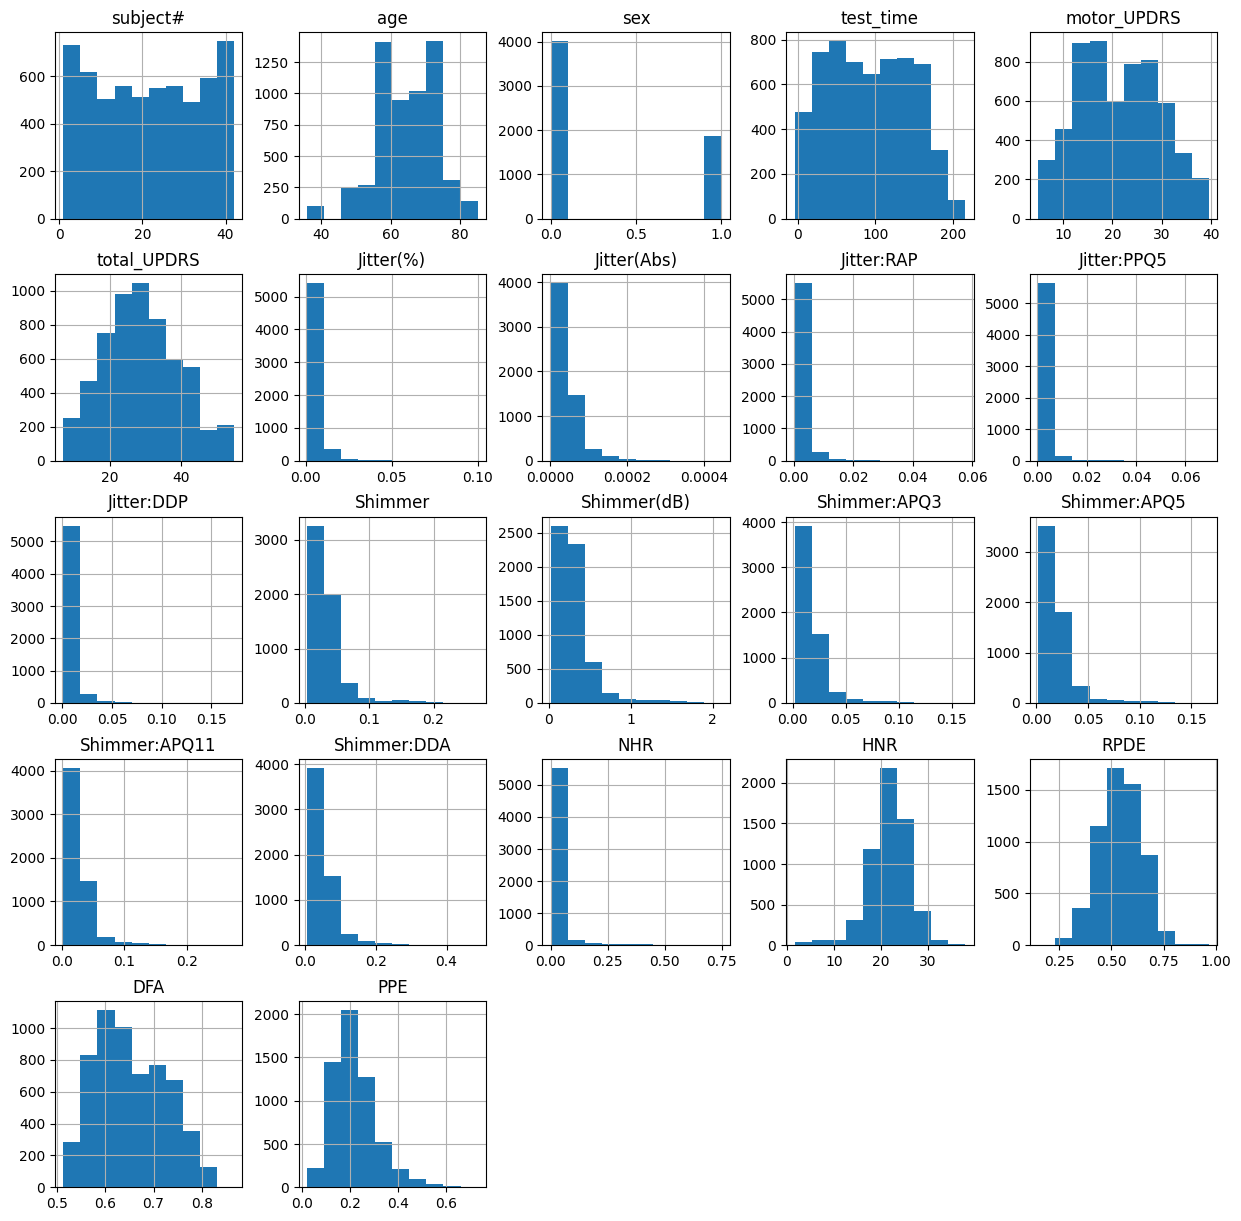

In [3]:
df.hist(figsize=(15, 15))
plt.show()

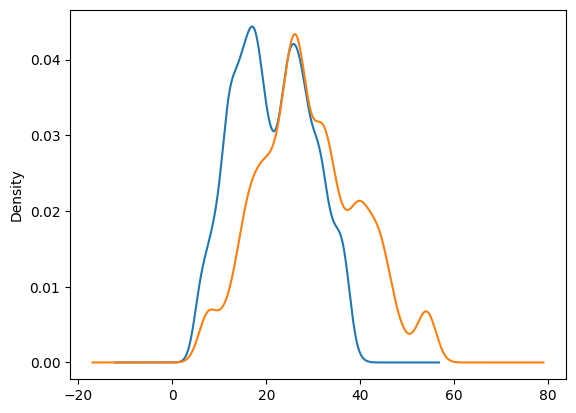

In [4]:
fig, ax = plt.subplots(1,1)
df["motor_UPDRS"].plot(kind="density")
df["total_UPDRS"].plot(kind="density")
plt.show()

Matrica medjusobne korelacije fičеrа

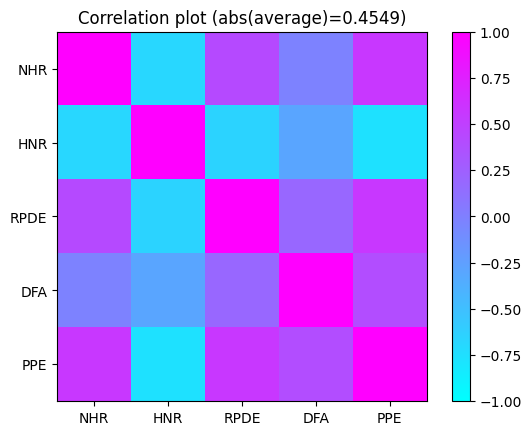

In [5]:
# Correlation plot
def corr_sub_plot(ax, df, title=""):
    corr = df.corr()
    avg_corr = np.absolute(corr.values[np.triu_indices_from(corr.values,1)]).mean()
    ax.set_title(title+" (abs(average)={0:.4})".format(avg_corr))
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_yticks(np.arange(len(df.columns)))
    ax.set_yticklabels(df.columns)
    ax.set_xticklabels(df.columns)
    return ax.imshow(corr, interpolation="nearest", cmap='cool', vmin=-1, vmax=1)

fig, ax = plt.subplots()
cax = corr_sub_plot(ax, df.iloc[:,17:], title="Correlation plot")
fig.colorbar(cax)
plt.show()

Treniranje decision_tree modela

In [6]:
clf = DecisionTreeRegressor()
clf.fit(X_train_scaled, y_train_total_UPDRS)
y_pred = clf.predict(X_test_scaled)
mse_total_UPDRS = mean_squared_error(y_test_total_UPDRS, y_pred)
r2_total_UPDRS = r2_score(y_test_total_UPDRS, y_pred)
print(f'Mean Squared Error (total_UPDRS): {mse_total_UPDRS}')
print(f'R-squared (total_UPDRS): {r2_total_UPDRS}')

Mean Squared Error (total_UPDRS): 19.681898376740424
R-squared (total_UPDRS): 0.8223864466952694


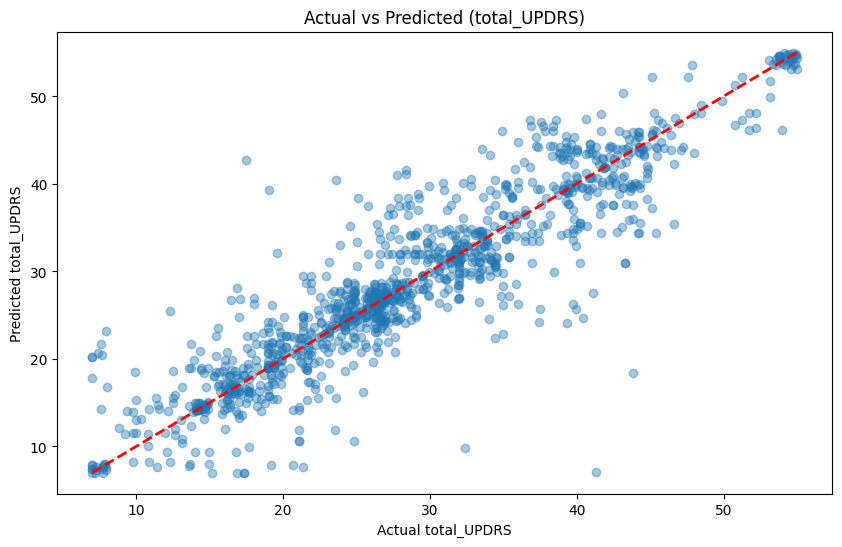

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_total_UPDRS, y_pred, alpha=0.4)
plt.plot([min(y_test_total_UPDRS), max(y_test_total_UPDRS)], [min(y_test_total_UPDRS), max(y_test_total_UPDRS)], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted (total_UPDRS)')
plt.xlabel('Actual total_UPDRS')
plt.ylabel('Predicted total_UPDRS')
plt.show()

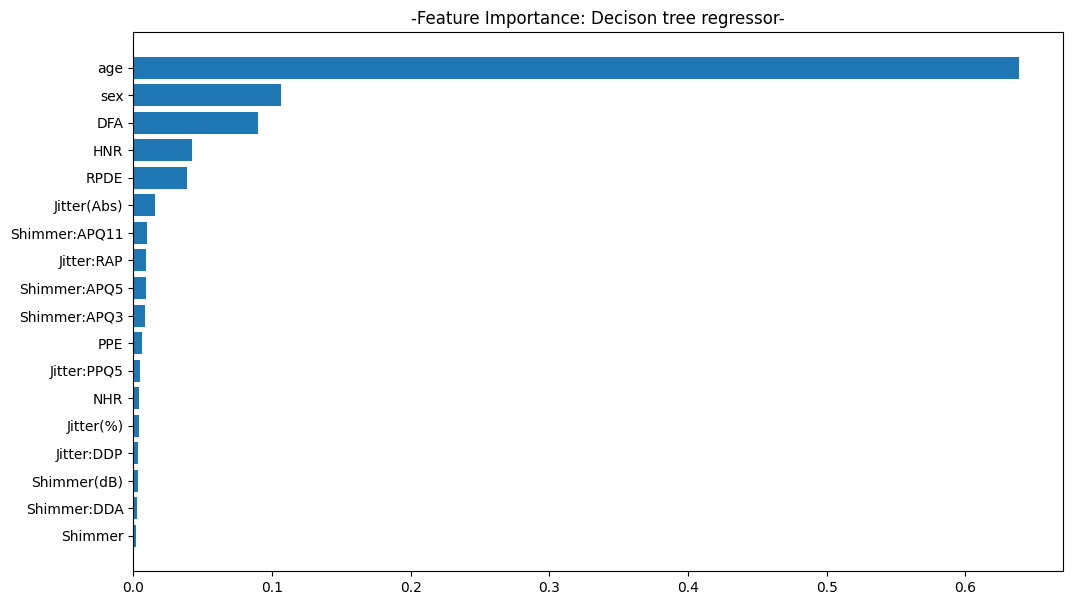

In [8]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('-Feature Importance: Decison tree regressor-')
plt.show()

Treniranje K-NN modela

In [9]:
k = 5

knn= KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train_total_UPDRS)
y_pred_total_UPDRS = knn.predict(X_test_scaled)

mse_total_UPDRS = mean_squared_error(y_test_total_UPDRS, y_pred_total_UPDRS)
print(f'Mean Squared Error (total_UPDRS): {mse_total_UPDRS}')
r2_total_UPDRS = r2_score(y_test_total_UPDRS, y_pred_total_UPDRS)
print(f'R-squared (total_UPDRS): {r2_total_UPDRS}')

Mean Squared Error (total_UPDRS): 36.825403329776684
R-squared (total_UPDRS): 0.667679884730473


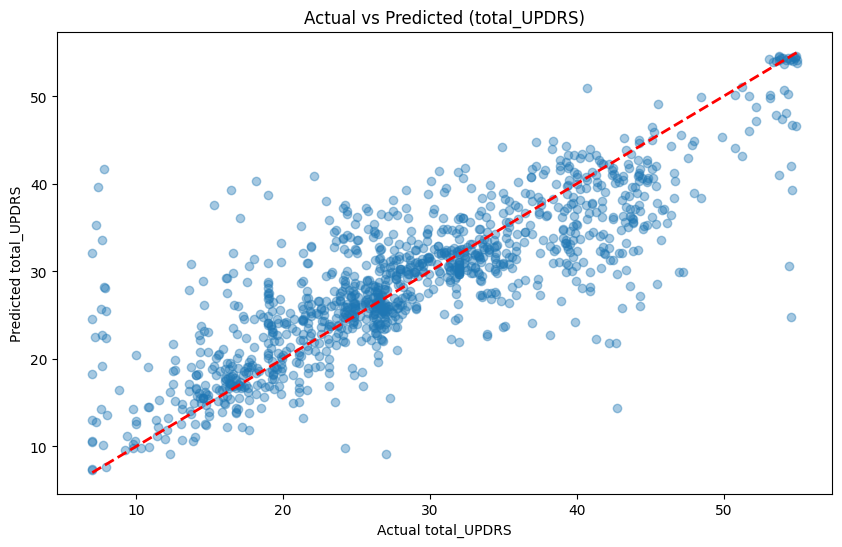

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_total_UPDRS, y_pred_total_UPDRS, alpha=0.4)
plt.plot([min(y_test_total_UPDRS), max(y_test_total_UPDRS)], [min(y_test_total_UPDRS), max(y_test_total_UPDRS)], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted (total_UPDRS)')
plt.xlabel('Actual total_UPDRS')
plt.ylabel('Predicted total_UPDRS')
plt.show()

Treniranje support_vector_machine modela

In [11]:
svr_total_UPDRS = SVR()
svr_total_UPDRS.fit(X_train_scaled, y_train_total_UPDRS)
y_pred_total_UPDRS = svr_total_UPDRS.predict(X_test_scaled)

mse_total_UPDRS = mean_squared_error(y_test_total_UPDRS, y_pred_total_UPDRS)
r2_total_UPDRS = r2_score(y_test_total_UPDRS, y_pred_total_UPDRS)
print(f'Mean Squared Error (total_UPDRS): {mse_total_UPDRS}')
print(f'R-squared (total_UPDRS): {r2_total_UPDRS}')

Mean Squared Error (total_UPDRS): 78.51951605312739
R-squared (total_UPDRS): 0.291423521094643


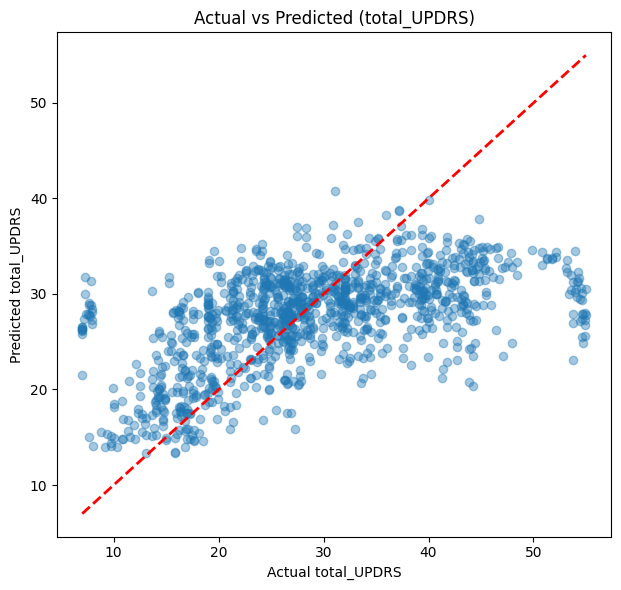

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_total_UPDRS, y_pred_total_UPDRS, alpha=0.4)
plt.plot([min(y_test_total_UPDRS), max(y_test_total_UPDRS)], [min(y_test_total_UPDRS), max(y_test_total_UPDRS)], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted (total_UPDRS)')
plt.xlabel('Actual total_UPDRS')
plt.ylabel('Predicted total_UPDRS')

plt.tight_layout()
plt.show()

Treniranje random_forest modela

In [13]:
rnd_forest = RandomForestRegressor(n_estimators=10, random_state=42)
rnd_forest.fit(X_train_scaled, y_train_total_UPDRS)
y_pred_total_UPDRS = rnd_forest.predict(X_test_scaled)

mse_total_UPDRS = mean_squared_error(y_test_total_UPDRS, y_pred_total_UPDRS)
r2_total_UPDRS = r2_score(y_test_total_UPDRS, y_pred_total_UPDRS)
print(f'Mean Squared Error (total_UPDRS): {mse_total_UPDRS}')
print(f'R-squared (total_UPDRS): {r2_total_UPDRS}')

Mean Squared Error (total_UPDRS): 9.578177497990724
R-squared (total_UPDRS): 0.9135645298518562


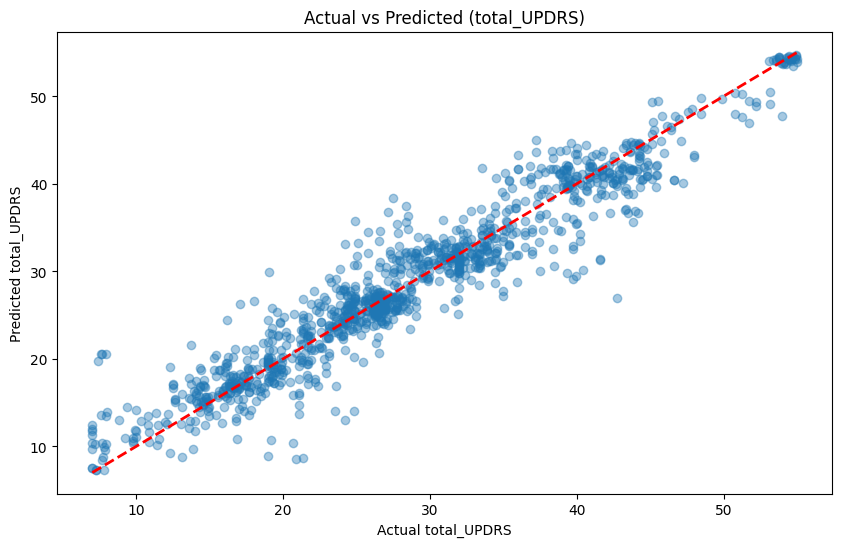

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_total_UPDRS, y_pred_total_UPDRS, alpha=0.4)
plt.plot([min(y_test_total_UPDRS), max(y_test_total_UPDRS)], [min(y_test_total_UPDRS), max(y_test_total_UPDRS)], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted (total_UPDRS)')
plt.xlabel('Actual total_UPDRS')
plt.ylabel('Predicted total_UPDRS')
plt.show()

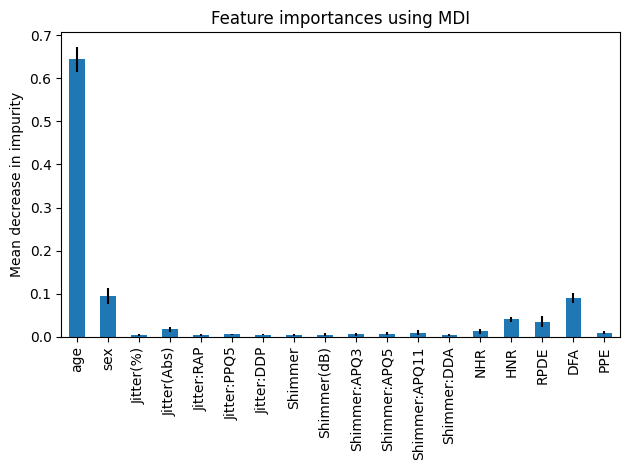

In [15]:
importances = rnd_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Treniranje lasso modela

In [16]:
rnd_forest = Lasso(alpha=0.1)
rnd_forest.fit(X_train_scaled, y_train_total_UPDRS)
y_pred_total_UPDRS = rnd_forest.predict(X_test_scaled)

mse_total_UPDRS = mean_squared_error(y_test_total_UPDRS, y_pred_total_UPDRS)
r2_total_UPDRS = r2_score(y_test_total_UPDRS, y_pred_total_UPDRS)
print(f'Mean Squared Error (total_UPDRS): {mse_total_UPDRS}')
print(f'R-squared (total_UPDRS): {r2_total_UPDRS}')

Mean Squared Error (total_UPDRS): 94.23902859652382
R-squared (total_UPDRS): 0.14956736344114974


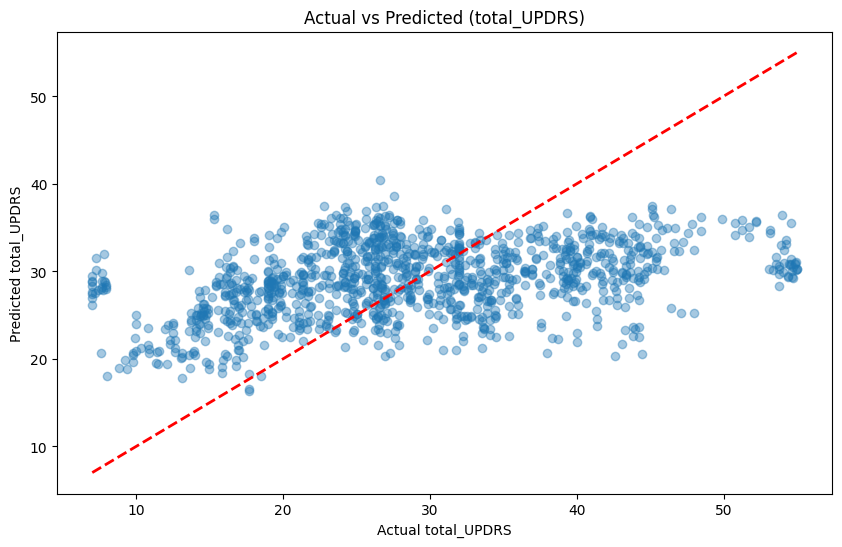

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_total_UPDRS, y_pred_total_UPDRS, alpha=0.4)
plt.plot([min(y_test_total_UPDRS), max(y_test_total_UPDRS)], [min(y_test_total_UPDRS), max(y_test_total_UPDRS)], '--', color='red', linewidth=2)
plt.title('Actual vs Predicted (total_UPDRS)')
plt.xlabel('Actual total_UPDRS')
plt.ylabel('Predicted total_UPDRS')
plt.show()